In [6]:
import numpy as np  # lineer algebra
import tensorflow as tf # ai
from tensorflow import keras # ai
import matplotlib.pyplot as plt # plot and graph
if (tf.__version__ != '2.0.0'): # before this you should import tensorflow 
  print("Tensorflow version to be deleted : ",tf.__version__)
  !pip uninstall tensorflow
  !pip install tensorflow==2.0.0
  print('Tensorflow latest v2.0.0 downloaded')
else:
  print("Tensorflow version :",tf.__version__)

Tensorflow version : 2.0.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist # loaded the data

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # this code return four diferent data

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# **Explore the data**
* Before training the model, let's examine the format of the data set.
* In the following section, there are 60,000 images in the training set, each shown as 28 x 28 pixels.

In [10]:
train_images.shape # 28x28 in size 60000 picture

(60000, 28, 28)

In [11]:
len(train_labels) # there is 60000 labels

60000

In [12]:
train_labels # labels take a value between 0 and 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape # test set contains 10000 images with a size of 28x28

(10000, 28, 28)

In [14]:
len(test_labels) # and the set contains 10000 labels

10000

# **Preprocess the data**
* Now we must process the data

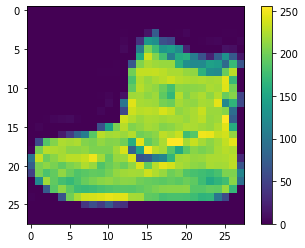

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # for color scala
plt.grid(False) # squared ground
plt.show()

* Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
* To do so, divide the values by 255.
* It's important that the training set and the testing set be preprocessed in the same way:

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Let's look at the top 25 data to check what we're doing.

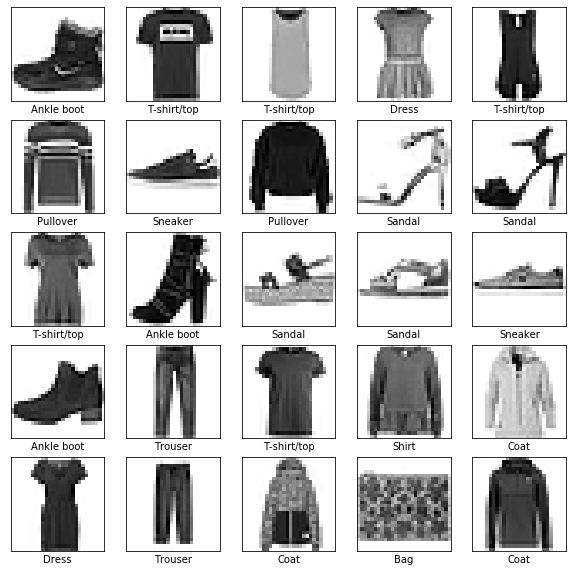

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([]) # space instead of pixels number
  plt.yticks([]) # space instead of pixels number
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary) # colorMap : default color scales binary : balack and white
  plt.xlabel(class_names[train_labels[i]]) # name of x axis 
plt.show()

# **Build the model**
* Building the neural network
* Configuring the layers of the model 
* Compiling the model.





##Set up the layers
@ The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.

@ Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # 28x28=784 one dimensional array
    keras.layers.Dense(128, activation='relu'), # 128 neurons
    keras.layers.Dense(10, activation='softmax') 
])

## Compile the model
* Loss function : This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer= 'adam', # default (0.1)
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Train the model**
* Feed the created model with training sets (train_images , train_labels )
* The model learns to associate images and labels
* You ask the model to make predictions about a test set. (test_images , test_labels)

In [20]:
model.fit(train_images , train_labels , epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4989 - accuracy: 0.8241
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3751 - accuracy: 0.8654
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3362 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3130 - accuracy: 0.8853
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2950 - accuracy: 0.8911
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2838 - accuracy: 0.8958
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2700 - accuracy: 0.8999
Epoch 8/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2584 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2474 - accuracy: 0.9083
Epoch 10/10
60

#**Evaluate accuracy**
* Next , Compare how the model performs on the test dataset.

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:',test_acc)

10000/1 - 1s - loss: 0.2507 - accuracy: 0.8869
Test accuracy: 0.8869


*   **Overfitting** is when a machine learning model performs worse on new, previously unseen inputs than on the training data.
*   **Underfitting** event is that the model does not understand the correlation between the data.







![alt text](https://miro.medium.com/proxy/1*_7OPgojau8hkiPUiHoGK_w.png)
**************************************************************

#**Make predictions**
With the model trained, you can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction.

In [23]:
predictions[0]

array([3.1776661e-08, 2.1007733e-12, 3.0200411e-08, 1.3249400e-10,
       5.5360477e-08, 8.5032848e-04, 8.2664840e-08, 1.1791065e-02,
       3.4038105e-06, 9.8735505e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value.

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [0]:
def plotImage(i, predictionsArray, trueLabel, img):
  predictionsArray, trueLabel, img = predictionsArray, trueLabel[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predictedLabel = np.argmax(predictionsArray)
  if predictedLabel == trueLabel:
    color = 'green'
  else:
    color='red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predictedLabel],
                                       100*np.max(predictionsArray),
                                       class_names[trueLabel]),
                                       color = color)

def plotValueArray(i, predictionsArray, trueLabel):
  predictionsArray, trueLabel = predictionsArray, trueLabel[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisPlot = plt.bar(range(10), predictionsArray, color = '#777777')
  plt.ylim([0,1])
  predictedLabel = np.argmax(predictionsArray)

  thisPlot[predictedLabel].set_color('red')
  thisPlot[trueLabel].set_color('green')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are green and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

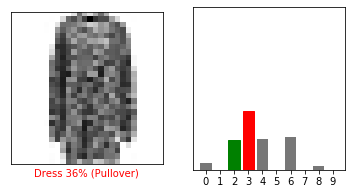

In [27]:
i = 1254
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plotImage(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plotValueArray(i, predictions[i], test_labels)
plt.show()


Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

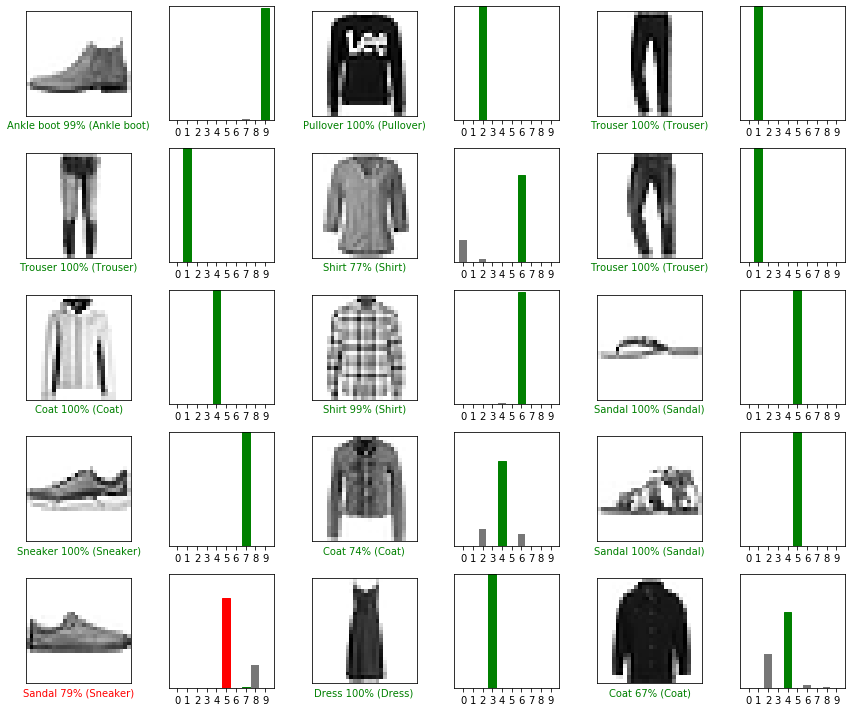

In [28]:
numRows, numCols = 5,3
numImages = numCols*numRows # 
plt.figure(figsize=(2*2*numCols , 2*numRows))
for i in range(numImages):
  plt.subplot(numRows, 2*numCols, 2*i+1)
  plotImage(i, predictions[i], test_labels, test_images)
  plt.subplot(numRows, 2*numCols, 2*i+2)
  plotValueArray(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#####Finally, use the trained model to make a prediction about a single image.

In [65]:
img = test_images[2019]#2019
print(img.shape)

(28, 28)


#####tf.keras models are optimized to make estimates of a batch or collection at a time. Accordingly, even if you use a single image, you must add it to the list.


In [66]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [67]:
predicitonsSingle = model.predict(img)
print(predicitonsSingle)

[[1.4688687e-04 8.3230150e-12 3.8782611e-01 7.4905648e-07 1.8762043e-01
  9.2567120e-08 4.2435834e-01 1.3177724e-11 4.7496695e-05 1.2392880e-12]]


6


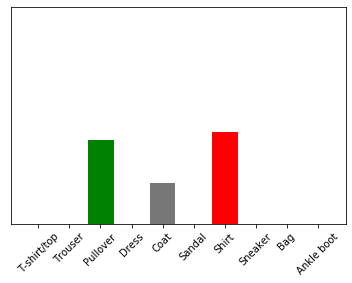

In [68]:
plotValueArray(1, predicitonsSingle[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
print(np.argmax(predicitonsSingle[0]))

![alt text](https://previews.123rf.com/images/stylephotographs/stylephotographs1701/stylephotographs170100276/70612476-hand-writing-thank-you-in-many-languages-on-a-chalkboard.jpg)